In [1]:
import torch

# Read and peak dataset - names.txt

In [2]:
names = open("names.txt").read().splitlines()

In [3]:
len(names), names[:10]

(32033,
 ['emma',
  'olivia',
  'ava',
  'isabella',
  'sophia',
  'charlotte',
  'mia',
  'amelia',
  'harper',
  'evelyn'])

In [4]:
max([len(name) for name in names]), min([len(name) for name in names])

(15, 2)

# Model - Bigram

count appear time in naive way

In [5]:
cnt = {}
for name in names:
    name = ["<S>"] + list(name) + ["<E>"]
    for ch, ch2 in zip(name, name[1:]):
        cnt[(ch, ch2)] = cnt.get((ch, ch2), 0) + 1
sorted(cnt.items(), key=lambda item: -item[-1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

count appear times in matrix

In [6]:
vocab = sorted(list(set(''.join(names))))
vocab += ["<S>", "<E>"]
vocab_size = len(vocab)
print(f"Unique characters: {vocab_size}")

# Build a mapping from string to integer.
stoi = {ch:i for i, ch in enumerate(vocab)}

# Create a matrix where a cell represents the number of character pair existing.
N = torch.zeros([28, 28], dtype=torch.int32)
for name in names:
    name = ["<S>"] + list(name) + ["<E>"]
    for ch, ch2 in zip(name, name[1:]):
        row, column = stoi[ch], stoi[ch2]
        N[row, column] += 1

Unique characters: 28


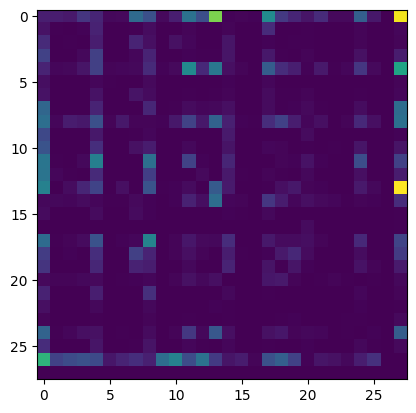

In [7]:
import matplotlib.pyplot as plt
plt.imshow(N)

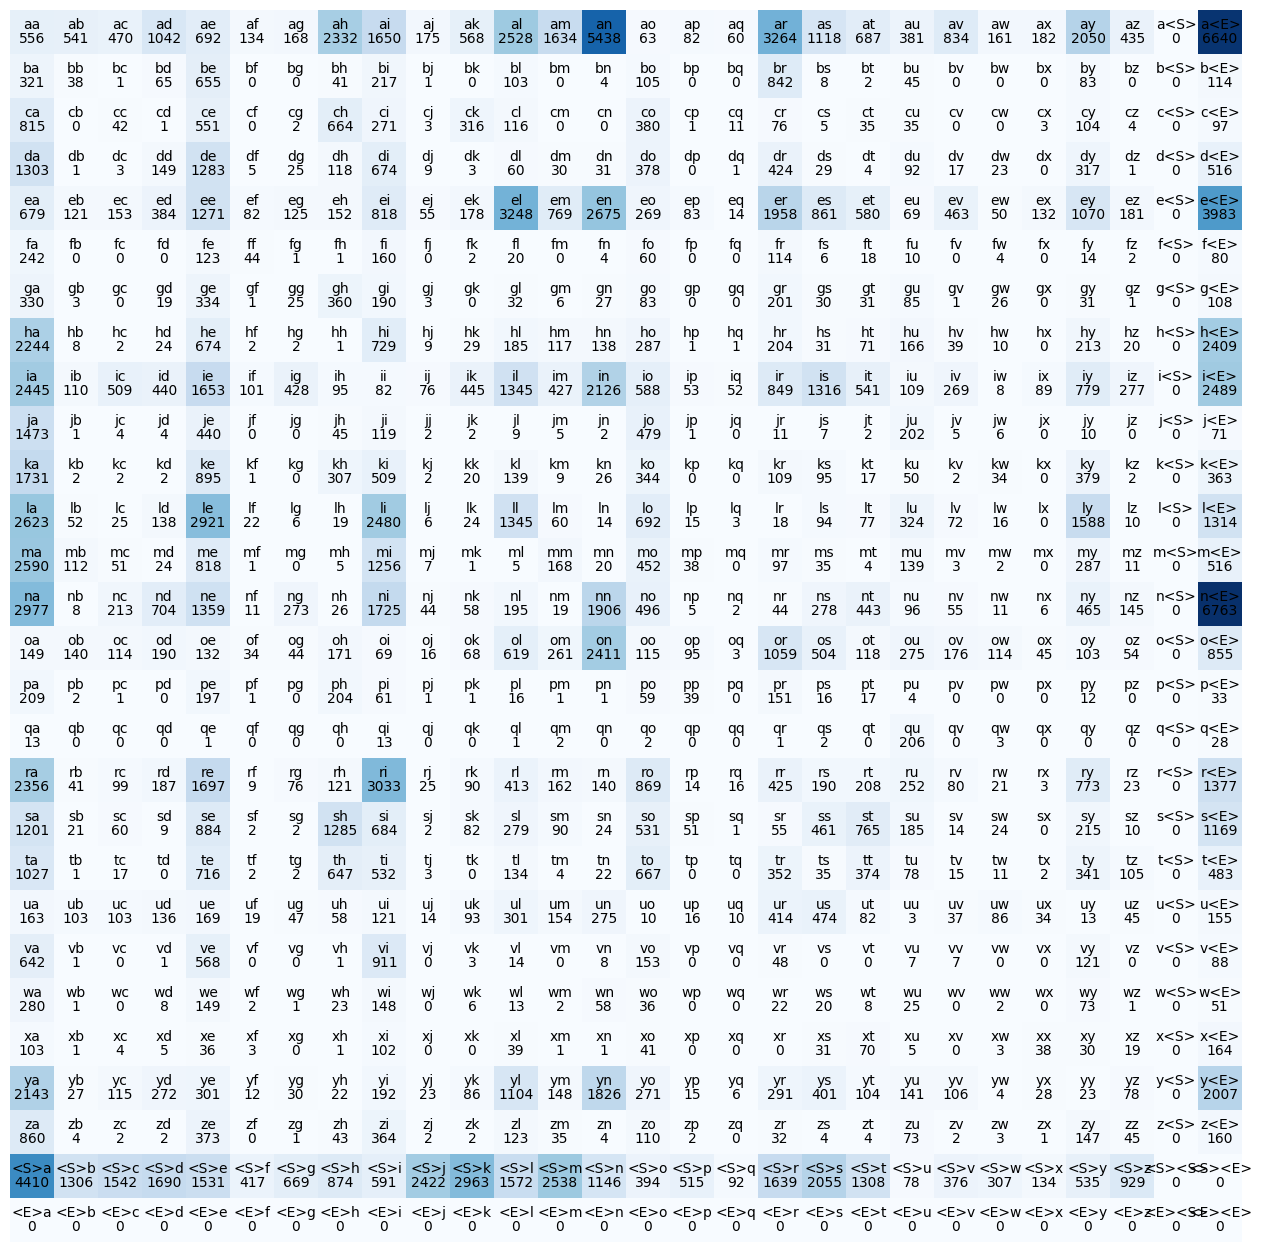

In [8]:
itos = {i:ch for ch, i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom")
        plt.text(j, i, N[i, j].item(), ha="center", va="top")
plt.axis("off");

Space saving refinement

Unique characters: 27


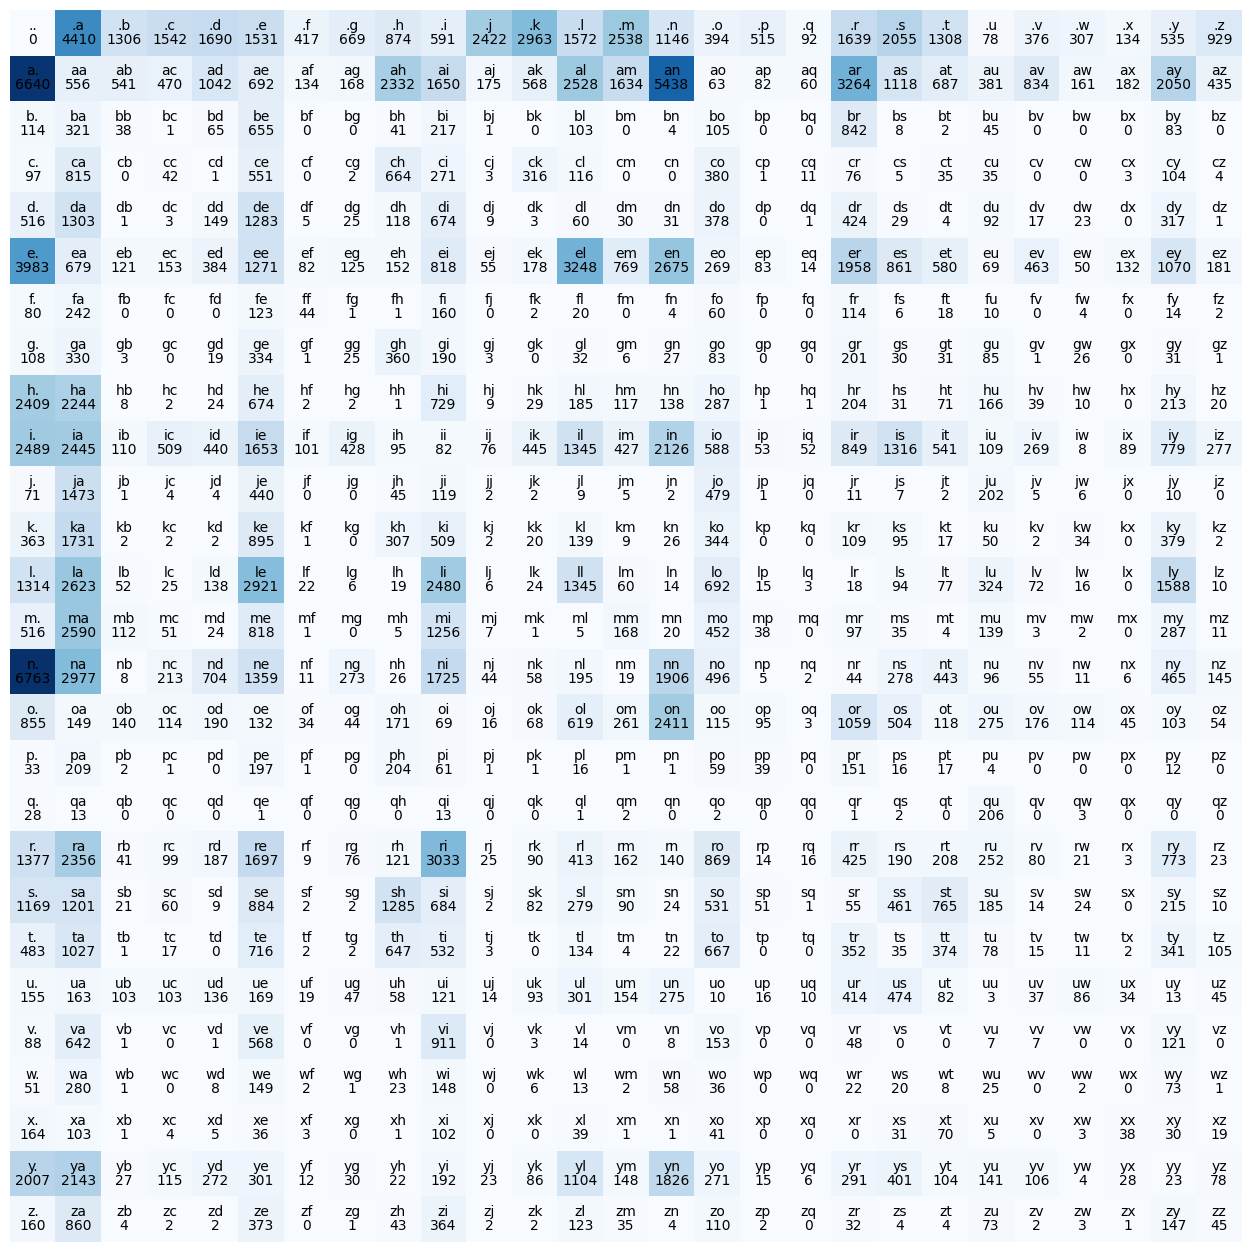

In [9]:
# Use . to replace <S> and <E>
vocab = sorted(list(set(''.join(names))))
vocab = ["."] + vocab
vocab_size = len(vocab)
print(f"Unique characters: {vocab_size}")

# Build a mapping from string to integer.
stoi = {ch:i for i, ch in enumerate(vocab)}

# Create a matrix where a cell represents the number of character pair existing.
N = torch.zeros([27, 27], dtype=torch.int32)
for name in names:
    name = ["."] + list(name) + ["."]
    for ch, ch2 in zip(name, name[1:]):
        row, column = stoi[ch], stoi[ch2]
        N[row, column] += 1

itos = {i:ch for ch, i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom")
        plt.text(j, i, N[i, j].item(), ha="center", va="top")
plt.axis("off");

# Sampling
The number in each cell above tells us how often a word is likely to appear given the word before it.

In [10]:
counts_distribution = N[0].float()
normalizaed_probability_distribution = counts_distribution / sum(N[0])
normalizaed_probability_distribution

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
# help(torch.multinomial)

# Replicate results everytime
g = torch.Generator().manual_seed(2147483647)
idx = 0

for _ in range(10):
    result = []
    while True:
        p = N[idx].float()
        normalizaed_probability_distribution = p / sum(N[idx])
        idx = torch.multinomial(normalizaed_probability_distribution, num_samples=1, replacement=True, generator=g).item()
        ch = itos[idx]
        result.append(ch)
        if ch == '.':
            break
    print(''.join(result))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


Vectorize for efficiency

In [12]:
# Not keepdim will cause issue that the sum of column will be 1 rather than row.
P = N / torch.sum(N, dim=1)
print(P[0], P[0].sum(), P[:, 0].sum())


P = N.float()
P = N / torch.sum(N, dim=1, keepdim=True)
P[0], P[0].sum()

tensor([0.0000, 0.1301, 0.4938, 0.4366, 0.3075, 0.0750, 0.4608, 0.3472, 0.1148,
        0.0334, 0.8352, 0.5879, 0.1126, 0.3821, 0.0625, 0.0497, 0.5019, 0.3382,
        0.1291, 0.2535, 0.2348, 0.0249, 0.1461, 0.3305, 0.1923, 0.0547, 0.3874]) tensor(7.0225) tensor(1.)


(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 tensor(1.))

In [13]:
g = torch.Generator().manual_seed(2147483647)
idx = 0

for _ in range(10):
    result = []
    while True:
        # Replace with vectorized probability distribution
        normalizaed_probability_distribution = P[idx]
        idx = torch.multinomial(normalizaed_probability_distribution, num_samples=1, replacement=True, generator=g).item()
        ch = itos[idx]
        result.append(ch)
        if ch == '.':
            break
    print(''.join(result))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


# Loss function
Evaluate the quality of the model

* Initialize the matrix using `torch.ones` rather than `torch.zeros` to smooth the reuslt and avoid 0 => inf in log
* Directly plus 1 when calculating prob distribution

In [14]:
P = (N+1).float()
P = P / torch.sum(P, dim=1, keepdim=True)

In [15]:
log_likelihood = 0.0
cnt = 0

for name in names:
    name = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name, name[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        prob = P[idx1, idx2]
        log_likelihood += torch.log(prob)
#         print(f"{ch1}{ch2} prob: {prob:.4f}, log_loss: {log_likelihood:.4f}")
        cnt += 1

print(f"Log likelihood: {log_likelihood}")
negative_log_likelihood = -log_likelihood
print(f"Negative log likelihood: {negative_log_likelihood}")
negative_log_likelihood /= cnt
negative_log_likelihood.item()

Log likelihood: -559951.5625
Negative log likelihood: 559951.5625


2.4543561935424805

# Neural Network

## Training Set

In [16]:
xs, ys = [], []

for name in names[:1]:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2] 
        xs.append(idx1), ys.append(idx2)
xs, ys = torch.tensor(xs), torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

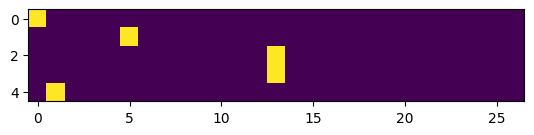

In [17]:
import torch.nn.functional as F
xs_one_hot = F.one_hot(xs, num_classes=27).float()
plt.imshow(xs_one_hot)

In [18]:
xs_one_hot.dtype

torch.float32

## One linear layer

Get activation

In [19]:
w = torch.randn([27, 27])
activation = xs_one_hot @ w

Softmax bc we want to get probs that are positive and sum to 1

In [20]:
logits = activation # Raw, unnormalized score
cnts = logits.exp() # Make it positive
prob = cnts / cnts.sum(dim=1, keepdim=True) # Normalize it to make it summing up to 1 on row.

# Summary - Ready for optimization

In [48]:
import torch.nn.functional as F

# init xs, ys, w
xs, ys = [], []
g = torch.Generator().manual_seed(2147483647)
w = torch.randn([27, 27], generator=g)

# Append input and labels
for name in names[:1]:
    name = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name, name[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        xs.append(idx1), ys.append(idx2)
xs, ys = torch.tensor(xs), torch.tensor(ys)
xenc = F.one_hot(xs, num_classes=27).float()


# # Feed forward
logits = xenc @ w
counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdim=True)
prob.shape

torch.Size([5, 27])

In [49]:
nlls = torch.zeros(5)
for i in range(5):
    print("-----------------------")
    # Index
    x, y = xs[i].item(), ys[i].item()
    print(f"Input index, Label index: {x, y}")
    print(f"Input, Label: {itos[x], itos[y]}")
    output = prob[i][y]
    print(f"Output prob distribution for {itos[x]}: {prob[i]}")
    print(f"Output prob on correct position: {output}")
    loss = output.log()
    print(f"log likelihood: {loss}")
    nll = -loss
    print(f"negative log likelihood: {nll}")
    nlls[i] = nll

print(f"Avg negative likelihood loss: {nlls.mean()}")

-----------------------
Input index, Label index: (0, 5)
Input, Label: ('.', 'e')
Output prob distribution for .: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Output prob on correct position: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
-----------------------
Input index, Label index: (5, 13)
Input, Label: ('e', 'm')
Output prob distribution for e: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
Output prob on correct position: 0.018050700426101685
log likelihood: -4.014570713043213
negative log likelihood: 4.014570713043213
-----------------------
In

Vectorize loss

In [59]:
ouput = prob[torch.arange(5), ys]
loss = -output.log().mean()
loss

tensor(3.7693)

------------------------Optimization-------------------------------

In [143]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [144]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn([27, 27], generator=g,requires_grad=True)

In [145]:
# Forward Pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
def softmax(logits):
    return logits.exp() / torch.sum(logits.exp(), dim=1, keepdim=True)
probs = softmax(logits) # Probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean() # Get loss in a vectorized way
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [152]:
# Backward Pass
W.grad = None # Reset gradients
loss.backward()
with torch.no_grad():
    W += -0.1 * W.grad

In [153]:
logits = xenc @ W
def softmax(logits):
    return logits.exp() / torch.sum(logits.exp(), dim=1, keepdim=True)
probs = softmax(logits) # Probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean() # Get loss in a vectorized way
loss

tensor(3.6892, grad_fn=<NegBackward0>)

# Put everything together
We expect to have the similar performance as cnts based model

In [197]:
# Data
names = open("names.txt").read().splitlines()
xs, ys = [], []
for name in names:
    name = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name, name[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        xs.append(idx1), ys.append(idx2)
xs, ys = torch.tensor(xs), torch.tensor(ys)
examples_num = xs.nelement()
examples_num

228146

In [198]:
# Init weight parameters
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [200]:
# Training loop
steps = 100
for i in range(steps):
    # Forward
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)

    loss = -probs[torch.arange(examples_num), ys].log().mean()
    if (i + 1) % 10 == 0:
        print(f'{i+1}/{steps} steps, loss: {loss.item()}')
    
    # Backward + Optimize
    W.grad = None
    loss.backward()
    with torch.no_grad():
        W.data += -50 * W.grad

10/100 steps, loss: 2.470843553543091
20/100 steps, loss: 2.4691860675811768
30/100 steps, loss: 2.467813014984131
40/100 steps, loss: 2.4666597843170166
50/100 steps, loss: 2.465679407119751
60/100 steps, loss: 2.464836597442627
70/100 steps, loss: 2.4641048908233643
80/100 steps, loss: 2.463463544845581
90/100 steps, loss: 2.4628970623016357
100/100 steps, loss: 2.462392807006836
